In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


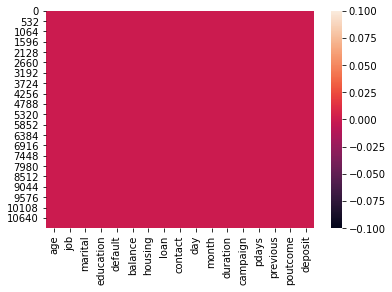

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
# checking datatype and other details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
#Select input and output variable from dataset
X=df.drop("deposit",axis=1) #select all input features except deposit
#or X=df.iloc[:,:-1]
Y=df["deposit"] #select target / output variable or Y=df.iloc[:,-1]

In [7]:
#train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
# creating function to avoid repetitive code writing
def create_model(model):
    model.fit(X_train,Y_train) # training the model
    Y_pred=model.predict(X_test) # testing the model
    print(classification_report(Y_test,Y_pred))
    return model

In [9]:
# Ensembling technique -> Naive Aggregation -> Hard Voting
# first taking LogisticRegression
# creating object of LogisticRegression
lr = LogisticRegression()

# DecisionTreeClassifier object creation - gini index
dt1 = DecisionTreeClassifier() # by default using gini index

# DecisionTreeClassifier object creation - entropy
dt2 = DecisionTreeClassifier(criterion='entropy') # by using entropy method

In [10]:
# create a model list

model_list = [('Logistic',lr),('Decision_tree_gini',dt1),('Decision_tree_entropy',dt2)]
# model_list = [('model name', object)]
# here model_list is a user defined list object
# A List consists of multiple tuples and each tuple the first argument has 
# to be a string that is name of the model and second argument has to be a 
# object of model(algorithm)

In [11]:
# importing class for hard voting
from sklearn.ensemble import VotingClassifier

In [12]:
# creating object for VotingClassifier
vc1 = VotingClassifier(estimators=model_list) #by default uses hard voting else use voting='soft'

In [13]:
# calling the function create_model()
model=create_model(vc1)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [14]:
# creating object for VotingClassifier - Soft Voting
vc2 = VotingClassifier(estimators=model_list,voting='soft')

In [15]:
# calling the function create_model()
model2=create_model(vc2)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.81      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [16]:
# Bagging
from sklearn.ensemble import BaggingClassifier

In [17]:
# object of bagging classifier
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1) # it will take 50 algo of LR

# no. of regression = n_estimators , max it should be 10

In [18]:
#call function
model=create_model(bc)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1760
           1       0.78      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [19]:
# pasting
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1,bootstrap=False)
#bydefault bootstrap=True means bagging

In [20]:
#call function
model=create_model(bc1)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1760
           1       0.78      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



score obtained  in bagging 0.73 and pasting  0.73
but better score obtained from voting as compare to bagging and pasting in this dataset bank.csv
in  soft voting : - recall : 82% means .82 which is good score as compare 
to bagging and pasting

Decision Tree works with Bagging only and not pasting since pasting does not repeat the data in subsets and we use Random forest over bagging because bagging does not support feature selection

In [21]:
# Random forest tree
# create object of BaggingClassifier class
bc2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=780,random_state=1)

In [22]:
# calling the function
model = create_model(bc2)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [23]:
# Using RandomForestTree class
# calling RFT from package

from sklearn.ensemble import RandomForestClassifier

In [24]:
# creating object
rfc = RandomForestClassifier(n_estimators=10,max_features=9,random_state=1)
# max_features < 10

In [25]:
# calling function
model = create_model(rfc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1760
           1       0.82      0.83      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [26]:
# installing stacking
#!pip install mlxtend

How stacking works : 

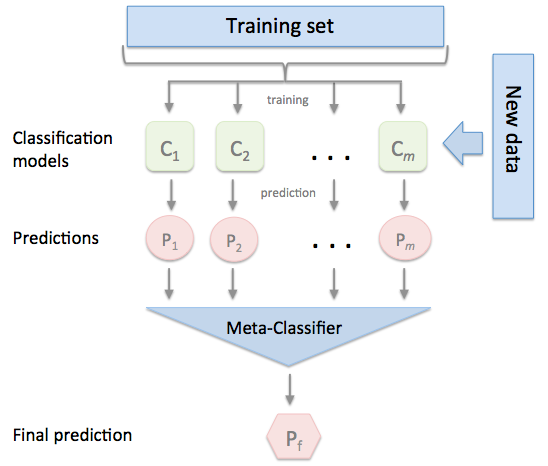

# Stacking Classifiers for Higher Predictive Performance
Using the Wisdom of Multiple Classifiers to Boost Performance

In [27]:
# calling StackingClassifier
from mlxtend.classifier import StackingClassifier

In [28]:
# Create object of LR , DT(E) , DT(G)
lr = LogisticRegression()
dt1 = DecisionTreeClassifier() # gini by default
dt2 = DecisionTreeClassifier(criterion='entropy')

In [29]:
# model list creation
model_list = [lr,dt1,dt2]

In [30]:
# using meta classifier , select meta algo for meta classifier : can use any
meta=LogisticRegression()

In [31]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [32]:
#call function
model=create_model(sc)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



# Boosting 
## ADA booster (Adapter  boosting)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
ada= AdaBoostClassifier(n_estimators=73) # n_estimators should be <=100
#AdaBoost create a decision stump means understood use model
#DecisionTreeClassifier

In [35]:
#call function
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1760
           1       0.83      0.81      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [36]:
# stage value is performance of decision stump

## Gradient Boosting

In [38]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=71) # n_estimators cannot be <=100

In [40]:
#call function
model=create_model(gbc)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.84      0.83      3349
weighted avg       0.84      0.83      0.83      3349



## Extreme Gradient Boosting : XGB

In [42]:
# installing external package from pythons community for XGBoost
#!pip install xgboost

In [43]:
from xgboost import XGBClassifier

In [44]:
# create object of XGBClassifier class and passing the parameter
xg = XGBClassifier(n_estimators=25,reg_alpha=1) # reg_alpha is handling
#automatic overfitting : reg means regularation and alpha or lambda : 
#hyperparameter

In [45]:
import warnings
warnings.filterwarnings('ignore')
#call function
model=create_model(xg)

[08:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

